In [1]:
import numpy as np
from gds_functions import gds_cut, gate
import gdstk
import gdspy
from PIL import Image
import matplotlib.pyplot as plt

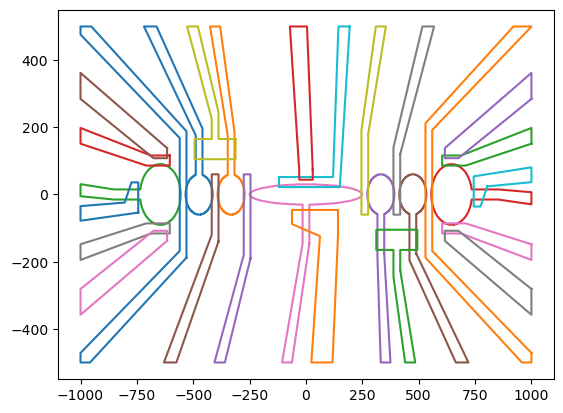

In [2]:
#gds_cut(read_file = "1x4_inner_structure.gds", x_lims = [-1000, 1000], y_lims = [-500, 500], out_file = "1x4_cut.gds", view = False)

loaded_lib = gdspy.GdsLibrary(infile = "1x4_cut.gds")

main_cell = loaded_lib.top_level()[0] 

amount_of_polies = len(main_cell.polygons)

gates = []

for j in range(amount_of_polies):
    x, y = [], []
    poly_object = main_cell.polygons[j]
    size = len(poly_object.polygons[0])
    for i in range(size):
        x.append(poly_object.polygons[0][i][0])
        y.append(poly_object.polygons[0][i][1])
    x.append(x[0])
    y.append(y[0])
    x_placement = np.array(x)
    y_placement = np.array(y)
    gates.append(gate(poly_object.layers[0], x_placement, y_placement, 0))

ax = plt.subplot()

for i in range(amount_of_polies):
    gates[i].plot_outline(ax)



